# Question B1 (15 marks)

Real world datasets often have a mix of numeric and categorical features – this dataset is one example. To build models on such data, categorical features have to be encoded or embedded.

PyTorch Tabular is a library that makes it very convenient to build neural networks for tabular data. It is built on top of PyTorch Lightning, which abstracts away boilerplate model training code and makes it easy to integrate other tools, e.g. TensorBoard for experiment tracking.

For questions B1 and B2, the following features should be used:   
- **Numeric / Continuous** features: dist_to_nearest_stn, dist_to_dhoby, degree_centrality, eigenvector_centrality, remaining_lease_years, floor_area_sqm
- **Categorical** features: month, town, flat_model_type, storey_range



---



In [1]:
SEED = 42

import os

import random
random.seed(SEED)

import numpy as np
np.random.seed(SEED)

import pandas as pd

from pytorch_tabular import TabularModel
from pytorch_tabular.models import CategoryEmbeddingModelConfig
from pytorch_tabular.config import (
    DataConfig,
    OptimizerConfig,
    TrainerConfig,
)

1.Divide the dataset (‘hdb_price_prediction.csv’) into train, validation and test sets by using entries from year 2019 and before as training data, year 2020 as validation data and year 2021 as test data.
**Do not** use data from year 2022 and year 2023.



In [2]:
# Load the dataset
df = pd.read_csv('hdb_price_prediction.csv')

# Dividing the dataset into train, validation and test sets by applying the given conditions
train_df = df[df['year'] <= 2019]  # Training data includes entries from year 2019 and before
validation_df = df[df['year'] == 2020]  # Validation data includes entries from year 2020
test_df = df[df['year'] == 2021]  # Test data includes entries from year 2021

2.Refer to the documentation of **PyTorch Tabular** and perform the following tasks: https://pytorch-tabular.readthedocs.io/en/latest/#usage
- Use **[DataConfig](https://pytorch-tabular.readthedocs.io/en/latest/data/)** to define the target variable, as well as the names of the continuous and categorical variables.
- Use **[TrainerConfig](https://pytorch-tabular.readthedocs.io/en/latest/training/)** to automatically tune the learning rate. Set batch_size to be 1024 and set max_epoch as 50.
- Use **[CategoryEmbeddingModelConfig](https://pytorch-tabular.readthedocs.io/en/latest/models/#category-embedding-model)** to create a feedforward neural network with 1 hidden layer containing 50 neurons.
- Use **[OptimizerConfig](https://pytorch-tabular.readthedocs.io/en/latest/optimizer/)** to choose Adam optimiser. There is no need to set the learning rate (since it will be tuned automatically) nor scheduler.
- Use **[TabularModel](https://pytorch-tabular.readthedocs.io/en/latest/tabular_model/)** to initialise the model and put all the configs together.

In [3]:
# Define the target variable, as well as the names of the continuous and categorical variables
target = ['resale_price']  # Target variable

# Categorical variables from the assignment pdf file
categorical_cols = ['month', 'town', 'flat_model_type', 'storey_range']  # Categorical variables
continuous_cols = ['dist_to_nearest_stn', 'dist_to_dhoby', 'degree_centrality', 'eigenvector_centrality', 'remaining_lease_years', 'floor_area_sqm']  # Continuous variables

# Define the data configuration
data_config = DataConfig(
    target=target,  # Target variable
    continuous_cols=continuous_cols,  # Continuous variables
    categorical_cols=categorical_cols  # Categorical variables
)

# Define the trainer configuration
trainer_config = TrainerConfig(
    auto_lr_find=True,  # Automatically tune the learning rate
    batch_size=1024,  # Set batch_size to be 1024
    max_epochs=50  # Set max_epoch as 50
)

# Define the model configuration
model_config = CategoryEmbeddingModelConfig(
    task="regression",  # Regression task
    layers="50",  # 1 hidden layer containing 50 neurons
    learning_rate=0.01  # Learning rate
)

# Define the optimiser configuration
optimizer_config = OptimizerConfig(
    optimizer="Adam"  # Choose Adam optimiser
)

# Initialise the model and put all the configs together
model = TabularModel(
    data_config=data_config,  # Data configuration
    model_config=model_config,  # Model configuration
    optimizer_config=optimizer_config,  # Optimiser configuration
    trainer_config=trainer_config  # Trainer configuration
)

# Display the model
model.fit(train=train_df, validation=validation_df)

# Test the model
test_predictions = model.predict(test_df)

# Evaluate the model
result = model.evaluate(test_df)

test_predictions

2024-03-06 15:49:06,968 - {pytorch_tabular.tabular_model:140} - INFO - Experiment Tracking is turned off

Seed set to 42


2024-03-06 15:49:06,986 - {pytorch_tabular.tabular_model:524} - INFO - Preparing the DataLoaders

2024-03-06 15:49:07,003 - {pytorch_tabular.tabular_datamodule:499} - INFO - Setting up the datamodule for          
regression task

2024-03-06 15:49:07,077 - {pytorch_tabular.tabular_model:574} - INFO - Preparing the Model: CategoryEmbeddingModel

2024-03-06 15:49:07,098 - {pytorch_tabular.tabular_model:340} - INFO - Preparing the Trainer

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


2024-03-06 15:49:07,245 - {pytorch_tabular.tabular_model:630} - INFO - Auto LR Find Started

Missing logger folder: /Users/kristiyancholakov/Programming/PyCharmProjects/SC4001/Programming Assignment/lightning_logs
/opt/anaconda3/envs/sc4001_assignment/lib/python3.8/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=9` in the `DataLoader` to improve performance.
/opt/anaconda3/envs/sc4001_assignment/lib/python3.8/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=9` in the `DataLoader` to improve performance.


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.5754399373371567
Restoring states from the checkpoint path at /Users/kristiyancholakov/Programming/PyCharmProjects/SC4001/Programming Assignment/.lr_find_945bd004-f67e-41b5-8097-a87672afded6.ckpt
Restored all states from the checkpoint at /Users/kristiyancholakov/Programming/PyCharmProjects/SC4001/Programming Assignment/.lr_find_945bd004-f67e-41b5-8097-a87672afded6.ckpt


2024-03-06 15:49:12,324 - {pytorch_tabular.tabular_model:643} - INFO - Suggested LR: 0.5754399373371567. For plot  
and detailed analysis, use `find_learning_rate` method.

2024-03-06 15:49:12,328 - {pytorch_tabular.tabular_model:652} - INFO - Training Started

┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name             ┃ Type                      ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ _backbone        │ CategoryEmbeddingBackbone │  2.9 K │
│ 1 │ _embedding_layer │ Embedding1dLayer          │  1.5 K │
│ 2 │ head             │ LinearHead                │     51 │
│ 3 │ loss             │ MSELoss                   │      0 │
└───┴──────────────────┴───────────────────────────┴────────┘

Trainable params: 4.5 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 4.5 K                                                                                                
Total estimated model params size (MB): 0

Output()

2024-03-06 15:49:37,931 - {pytorch_tabular.tabular_model:663} - INFO - Training the model completed

2024-03-06 15:49:37,933 - {pytorch_tabular.tabular_model:1489} - INFO - Loading the best model

Output()

/opt/anaconda3/envs/sc4001_assignment/lib/python3.8/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=9` in the `DataLoader` to improve performance.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │       7309916672.0        │
│  test_mean_squared_error  │       7309916672.0        │
└───────────────────────────┴───────────────────────────┘

,resale_price_prediction
87370,150961.640625
87371,177636.187500
87372,303759.468750
87373,297804.281250
87374,272824.187500
...,...
116422,567490.875000
116423,561628.375000
116424,629146.125000
116425,672985.937500


3.Report the test RMSE error and the test R2 value that you obtained.



In [4]:
# Import the dependencies we will need to compute the RMSE and R2
from sklearn.metrics import mean_squared_error, r2_score

# Define the ground truth and the predictions
y_true = test_df['resale_price']  # Ground truth
y_pred = test_predictions['resale_price_prediction']  # Predictions

print('RMSE & R2')

# Compute the RMSE
rmse = mean_squared_error(y_true, y_pred, squared=False)  # Set squared=False to get the RMSE
print(f'Test RMSE: {rmse}')

# Compute the R2 value
r2 = r2_score(y_true, y_pred)
print(f'Test R2: {r2}')

# Compute the MSE
print()
print('MSE')
mse = mean_squared_error(y_true, y_pred)
print(f'Ours Test MSE: {mse:.3f}')
print(f'Model Test MSE: {result[0]["test_mean_squared_error"]:.3f}')
print('As we can see we get almost the same value for MSE compared to the computed from th model.evaluate method.')

RMSE & R2
Test RMSE: 85498.0448201513
Test R2: 0.723653089530366

MSE
Ours Test MSE: 7309915668.069
Model Test MSE: 7309916672.000
As we can see we get almost the same value for MSE compared to the computed from th model.evaluate method.


4.Print out the corresponding rows in the dataframe for the top 25 test samples with the largest errors. Identify a trend in these poor predictions and suggest a way to reduce these errors.



In [5]:
# Add an error column to the test predictions dataframe based on the mean squared error
test_predictions['error'] = (y_true - y_pred) ** 2 / len(y_true)

# Creating a new dataframe with the top 25 test samples with the largest mean squared errors
poor_predictions = test_predictions.sort_values(by="error", ascending=False).head(25)

# Concatenating the test dataframe with the poor predictions dataframe
poor_predictions = pd.concat([test_df.loc[poor_predictions.index], poor_predictions], axis=1)
poor_predictions.head(25)

,month,year,town,full_address,nearest_stn,dist_to_nearest_stn,dist_to_dhoby,degree_centrality,eigenvector_centrality,flat_model_type,remaining_lease_years,floor_area_sqm,storey_range,resale_price,resale_price_prediction,error
106192,12,2021,QUEENSTOWN,89 DAWSON ROAD,Queenstown,0.658035,3.807573,0.016807,0.008342,"4 ROOM, Premium Apartment Loft",93.333333,109.0,04 TO 06,968000.0,529561.31250,6.615565e+06
92405,11,2021,BUKIT MERAH,46 SENG POH ROAD,Tiong Bahru,0.581977,2.309477,0.016807,0.047782,"3 ROOM, Standard",50.166667,88.0,01 TO 03,780000.0,348461.78125,6.408963e+06
106057,10,2021,QUEENSTOWN,92 DAWSON ROAD,Queenstown,0.584731,3.882019,0.016807,0.008342,"4 ROOM, Premium Apartment Loft",93.500000,97.0,13 TO 15,958000.0,541103.00000,5.981454e+06
105699,6,2021,QUEENSTOWN,91 DAWSON ROAD,Queenstown,0.745596,3.720593,0.016807,0.008342,"4 ROOM, Premium Apartment Loft",93.916667,109.0,31 TO 33,1032888.0,618634.87500,5.905828e+06
105695,6,2021,QUEENSTOWN,91 DAWSON ROAD,Queenstown,0.745596,3.720593,0.016807,0.008342,"4 ROOM, Premium Apartment Loft",93.916667,97.0,07 TO 09,930000.0,520373.53125,5.774644e+06
105696,6,2021,QUEENSTOWN,89 DAWSON ROAD,Queenstown,0.658035,3.807573,0.016807,0.008342,"4 ROOM, Premium Apartment Loft",93.916667,109.0,10 TO 12,950000.0,551919.75000,5.453691e+06
105468,3,2021,QUEENSTOWN,90 DAWSON ROAD,Queenstown,0.701852,3.763948,0.016807,0.008342,"4 ROOM, Premium Apartment Loft",94.166667,95.0,10 TO 12,920000.0,529762.00000,5.240930e+06
105702,6,2021,QUEENSTOWN,150 MEI LING STREET,Queenstown,0.245207,4.709043,0.016807,0.008342,"EXECUTIVE, Apartment",73.416667,148.0,10 TO 12,1235000.0,847754.18750,5.160867e+06
92442,11,2021,BUKIT MERAH,127D KIM TIAN ROAD,Tiong Bahru,0.686789,2.664024,0.016807,0.047782,"5 ROOM, Improved",90.333333,113.0,16 TO 18,1165000.0,777849.87500,5.158317e+06
106190,12,2021,QUEENSTOWN,92 DAWSON ROAD,Queenstown,0.584731,3.882019,0.016807,0.008342,"4 ROOM, Premium Apartment Loft",93.333333,97.0,16 TO 18,938888.0,557938.50000,4.994408e+06


In [6]:
# Now, let's perform some analysis on the poor predictions to identify the trend

# Let's start by displaying the unique values of the categorical columns and the mean and standard deviation of the continuous columns

# Display the unique values of the categorical columns
for col in categorical_cols:
    print(f'Unique values for {col}: {poor_predictions[col].unique()}')
    
# Display the mean and standard deviation of the continuous columns
poor_predictions[continuous_cols].describe()

Unique values for month: [12 11 10  6  3  9  4  8  7]
Unique values for town: ['QUEENSTOWN' 'BUKIT MERAH' 'ANG MO KIO' 'BISHAN' 'WOODLANDS'
 'KALLANG/WHAMPOA']
Unique values for flat_model_type: ['4 ROOM, Premium Apartment Loft' '3 ROOM, Standard'
 'EXECUTIVE, Apartment' '5 ROOM, Improved' '5 ROOM, DBSS'
 '3 ROOM, Terrace']
Unique values for storey_range: ['04 TO 06' '01 TO 03' '13 TO 15' '31 TO 33' '07 TO 09' '10 TO 12'
 '16 TO 18' '34 TO 36' '25 TO 27' '28 TO 30' '22 TO 24' '19 TO 21'
 '37 TO 39']


,dist_to_nearest_stn,dist_to_dhoby,degree_centrality,eigenvector_centrality,remaining_lease_years,floor_area_sqm
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,0.643633,4.304202,0.017479,0.017900,88.073333,113.160000
std,0.170791,2.850896,0.003361,0.017817,12.890954,28.937692
min,0.221328,2.128424,0.016807,0.000024,50.083333,88.000000
25%,0.584731,3.720593,0.016807,0.008342,90.333333,97.000000
50%,0.686789,3.763948,0.016807,0.008342,93.583333,109.000000
75%,0.745596,3.882019,0.016807,0.015854,93.916667,113.000000
max,0.998313,16.945885,0.033613,0.053004,96.750000,210.000000


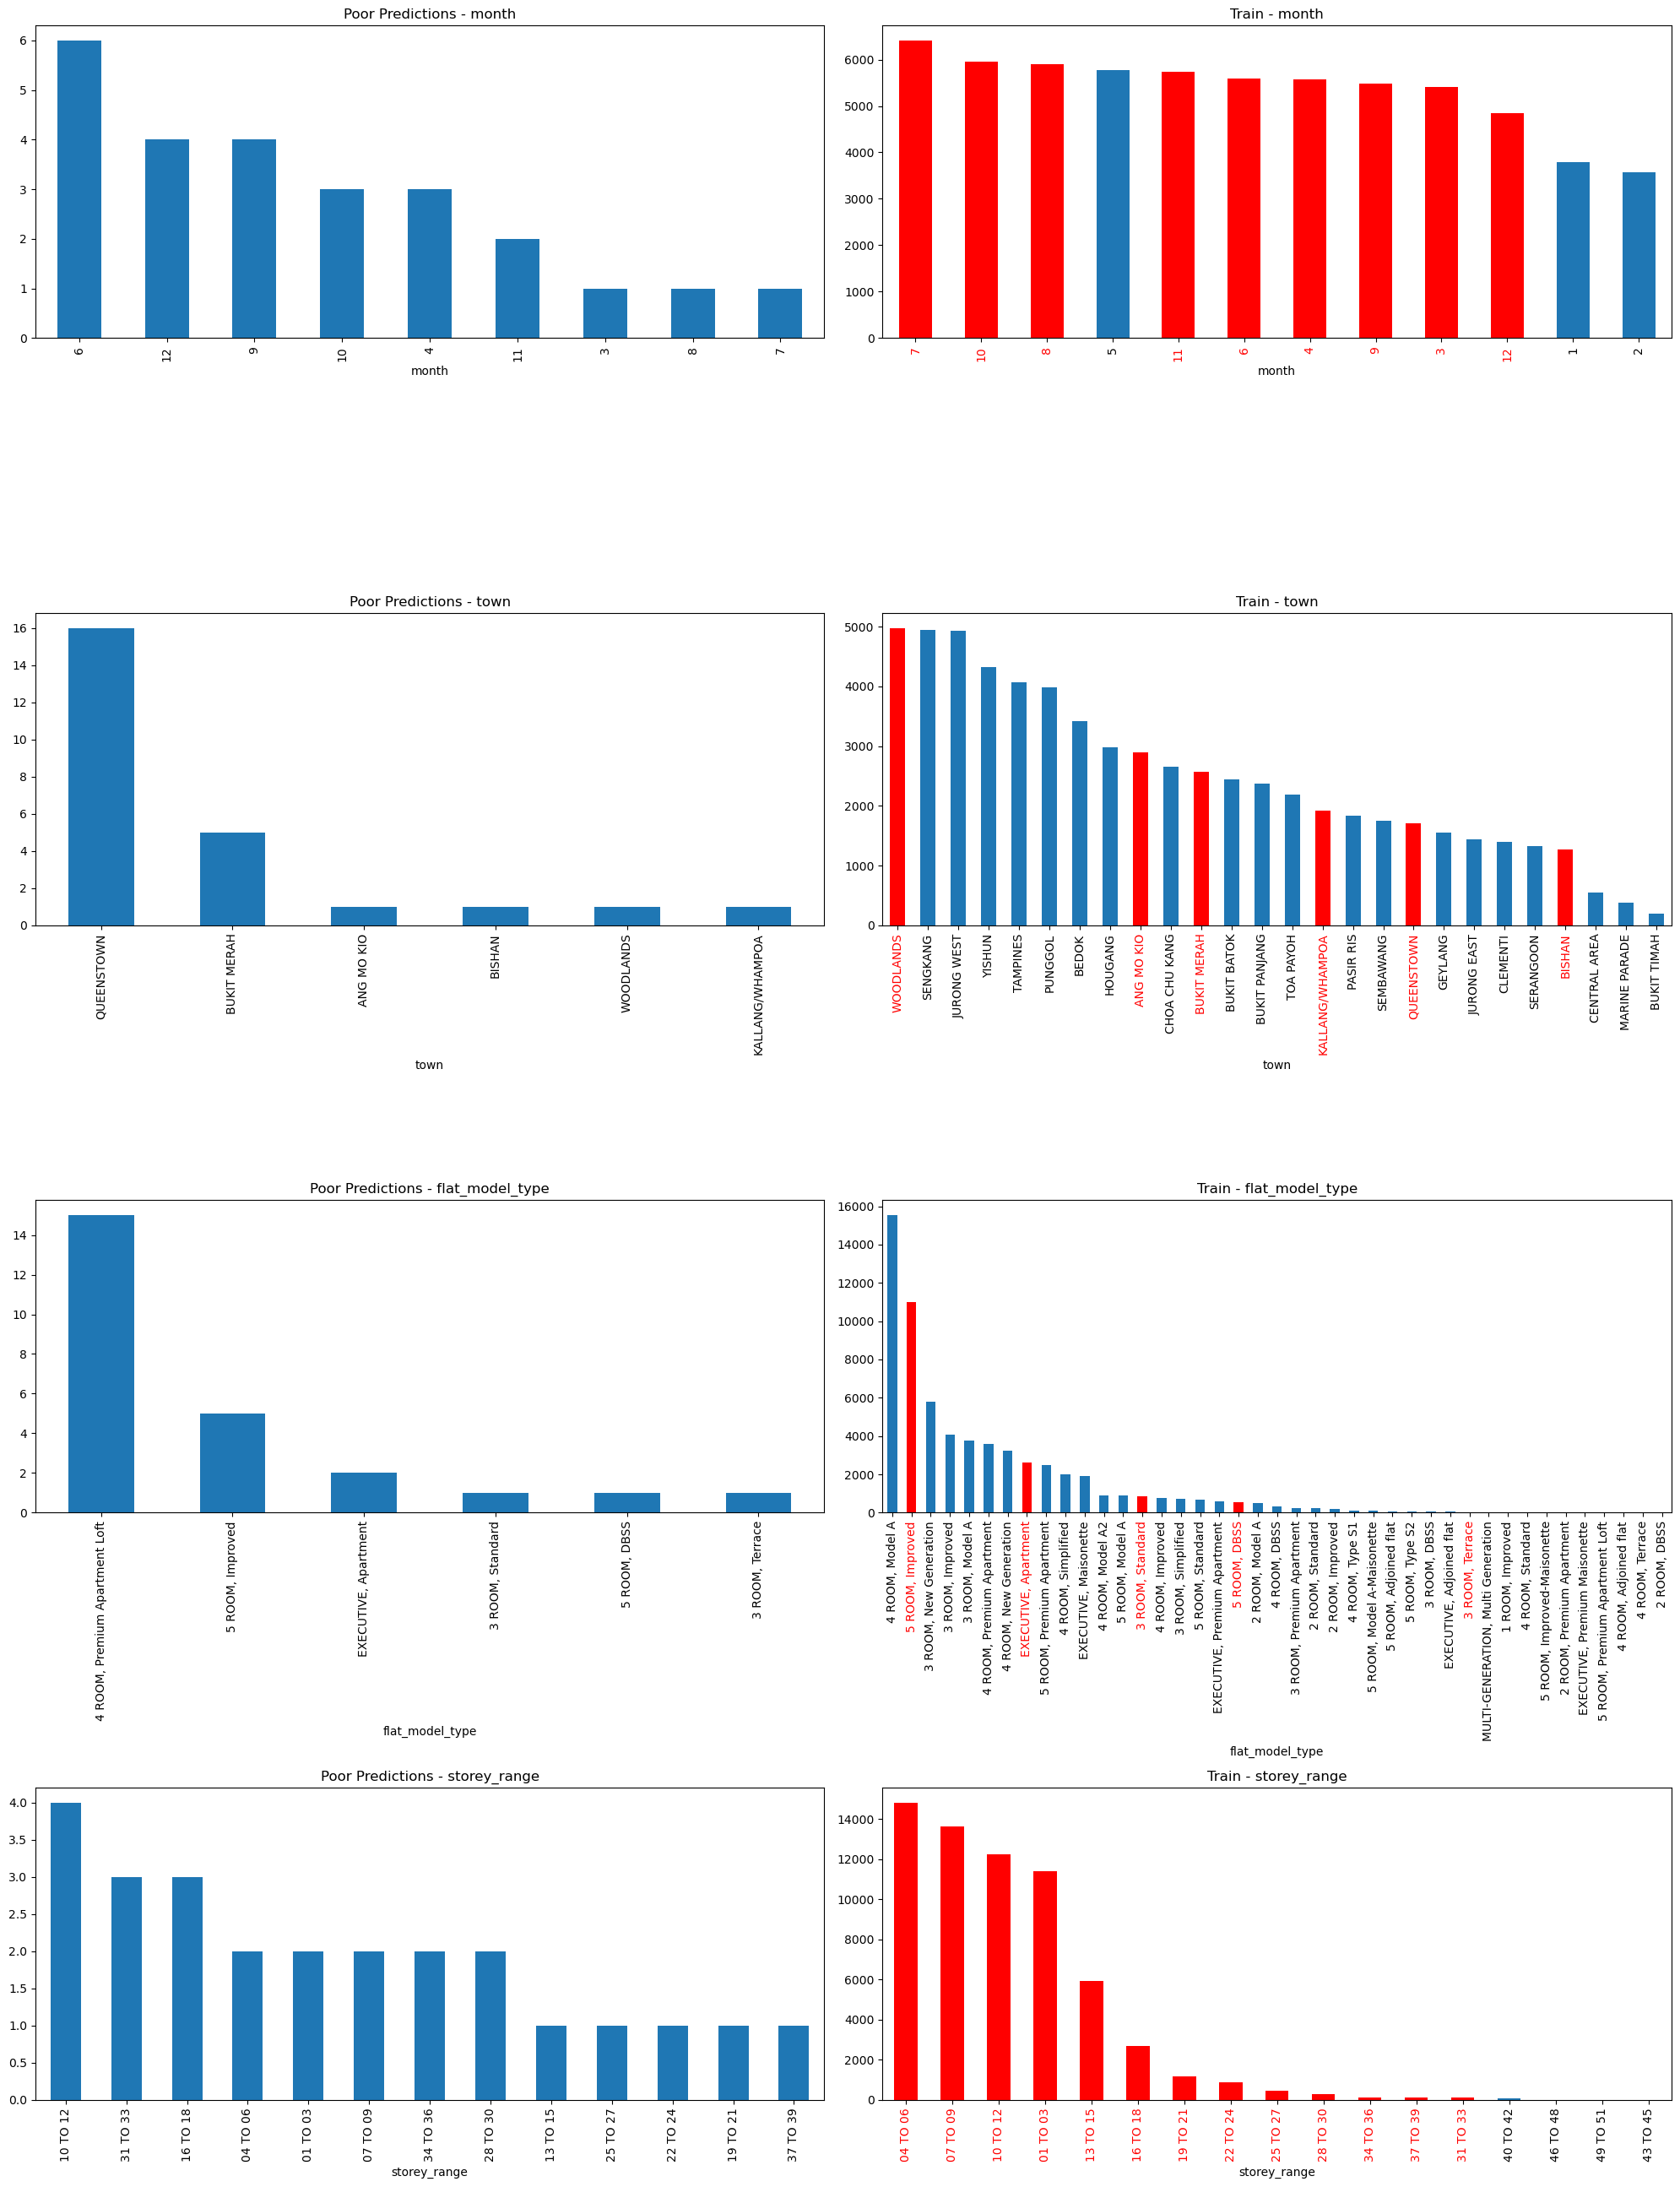

In [7]:
# Import the dependencies we will need to plot the results
import matplotlib.pyplot as plt

# Now we will compare the distribution of the unique values from the top 25 poor predictions of the categorical columns in the train samples with the distribution of the unique values of the categorical columns in the poor predictions dataframe
# We will display the poor prediction plot on the left and the train plot on the right (the red bars represent the unique values from the top 25 poor predictions)

# Define a plot to hold the subplots
fig, axes = plt.subplots(nrows=len(categorical_cols), ncols=2, figsize=(20, 26))

# Iterate through the categorical columns
for col in categorical_cols:
    # Define the value counts of the unique values of the categorical columns in the poor predictions dataframe
    poor_value_counts = poor_predictions[col].value_counts()
    # Define the value counts of the unique values of the categorical columns in the train dataframe
    train_value_counts = train_df[col].value_counts()
    
    # Plot the count of occurrences of each unique value in the poor predictions dataframe
    poor_value_counts.plot(kind='bar', ax=axes[categorical_cols.index(col), 0], title=f'Poor Predictions - {col}')
    # Plot the count of occurrences of each unique value in the train dataframe
    train_value_counts.plot(kind='bar', ax=axes[categorical_cols.index(col), 1], title=f'Train - {col}')
    # Paint the bars of the unique values from the top 25 poor predictions in red
    for i in range(len(poor_value_counts)):
        if poor_value_counts.index[i] in train_value_counts.index:  # If the unique value is present in the train dataframe
            axes[categorical_cols.index(col), 1].patches[train_value_counts.index.get_loc(poor_value_counts.index[i])].set_facecolor('r')  # Paint the bar in red
            # Paint the tick label in red
            axes[categorical_cols.index(col), 1].get_xticklabels()[train_value_counts.index.get_loc(poor_value_counts.index[i])].set_color('r')

plt.tight_layout() # Adjust the plot layout for better representation

In [8]:
# Categorical columns observations
categorical_observations = """
1. The most noticeable trend is the high number or poorly predicted samples with the unique value '4 ROOM, Premium Apartment Loft' in the 'flat_model_type' column. When we compare this with the distribution of the unique values in the train samples, we can see that this unique value is not even present in the training samples. This suggests that the model has not been trained to predict the resale price of this type of flat model, which is why it is performing poorly.

2. The second observation that can be made is the high number of poorly predicted samples with the unique value 'QUEENSTOWN' in the 'town' column. When we compare this with the distribution of the unique values in the train samples, we can see that this unique value is present in the training samples. However, it is not from the most frequent unique values in the training samples. Also, the Queenstown Singapore area is quite complex area (with some parts close to the shipping port and some more central parts), big part of the area is also taken by the NUS campus. The poor prediction may be due to the different subareas in the Queenstown area.
"""
categorical_solutions = """
1. One way to reduce these errors is to ensure that the model is trained on a representative sample of the data. This means that the training data should include a good representation of all the unique values of the categorical columns. In this case, the model should be trained on a representative sample of the 'flat_model_type' column, including the '4 ROOM, Premium Apartment Loft' unique value. We should also ensure there is enough data for each unique value.

2. In order to solve the problem with the 'town' column, we should ensure the model is trained on samples which represent base subareas of the towns. For example, the Queenstown district can be divided into several parts for better representation of the area because the subareas will have different characteristics, especially in the Queenstown case where the parts of the area are quite different.
"""

# Display the observations and solutions
print(f'Observations:{categorical_observations}')
print(f'Solutions:{categorical_solutions}')

Observations:
1. The most noticeable trend is the high number or poorly predicted samples with the unique value '4 ROOM, Premium Apartment Loft' in the 'flat_model_type' column. When we compare this with the distribution of the unique values in the train samples, we can see that this unique value is not even present in the training samples. This suggests that the model has not been trained to predict the resale price of this type of flat model, which is why it is performing poorly.

2. The second observation that can be made is the high number of poorly predicted samples with the unique value 'QUEENSTOWN' in the 'town' column. When we compare this with the distribution of the unique values in the train samples, we can see that this unique value is present in the training samples. However, it is not from the most frequent unique values in the training samples. Also, the Queenstown Singapore area is quite complex area (with some parts close to the shipping port and some more central part

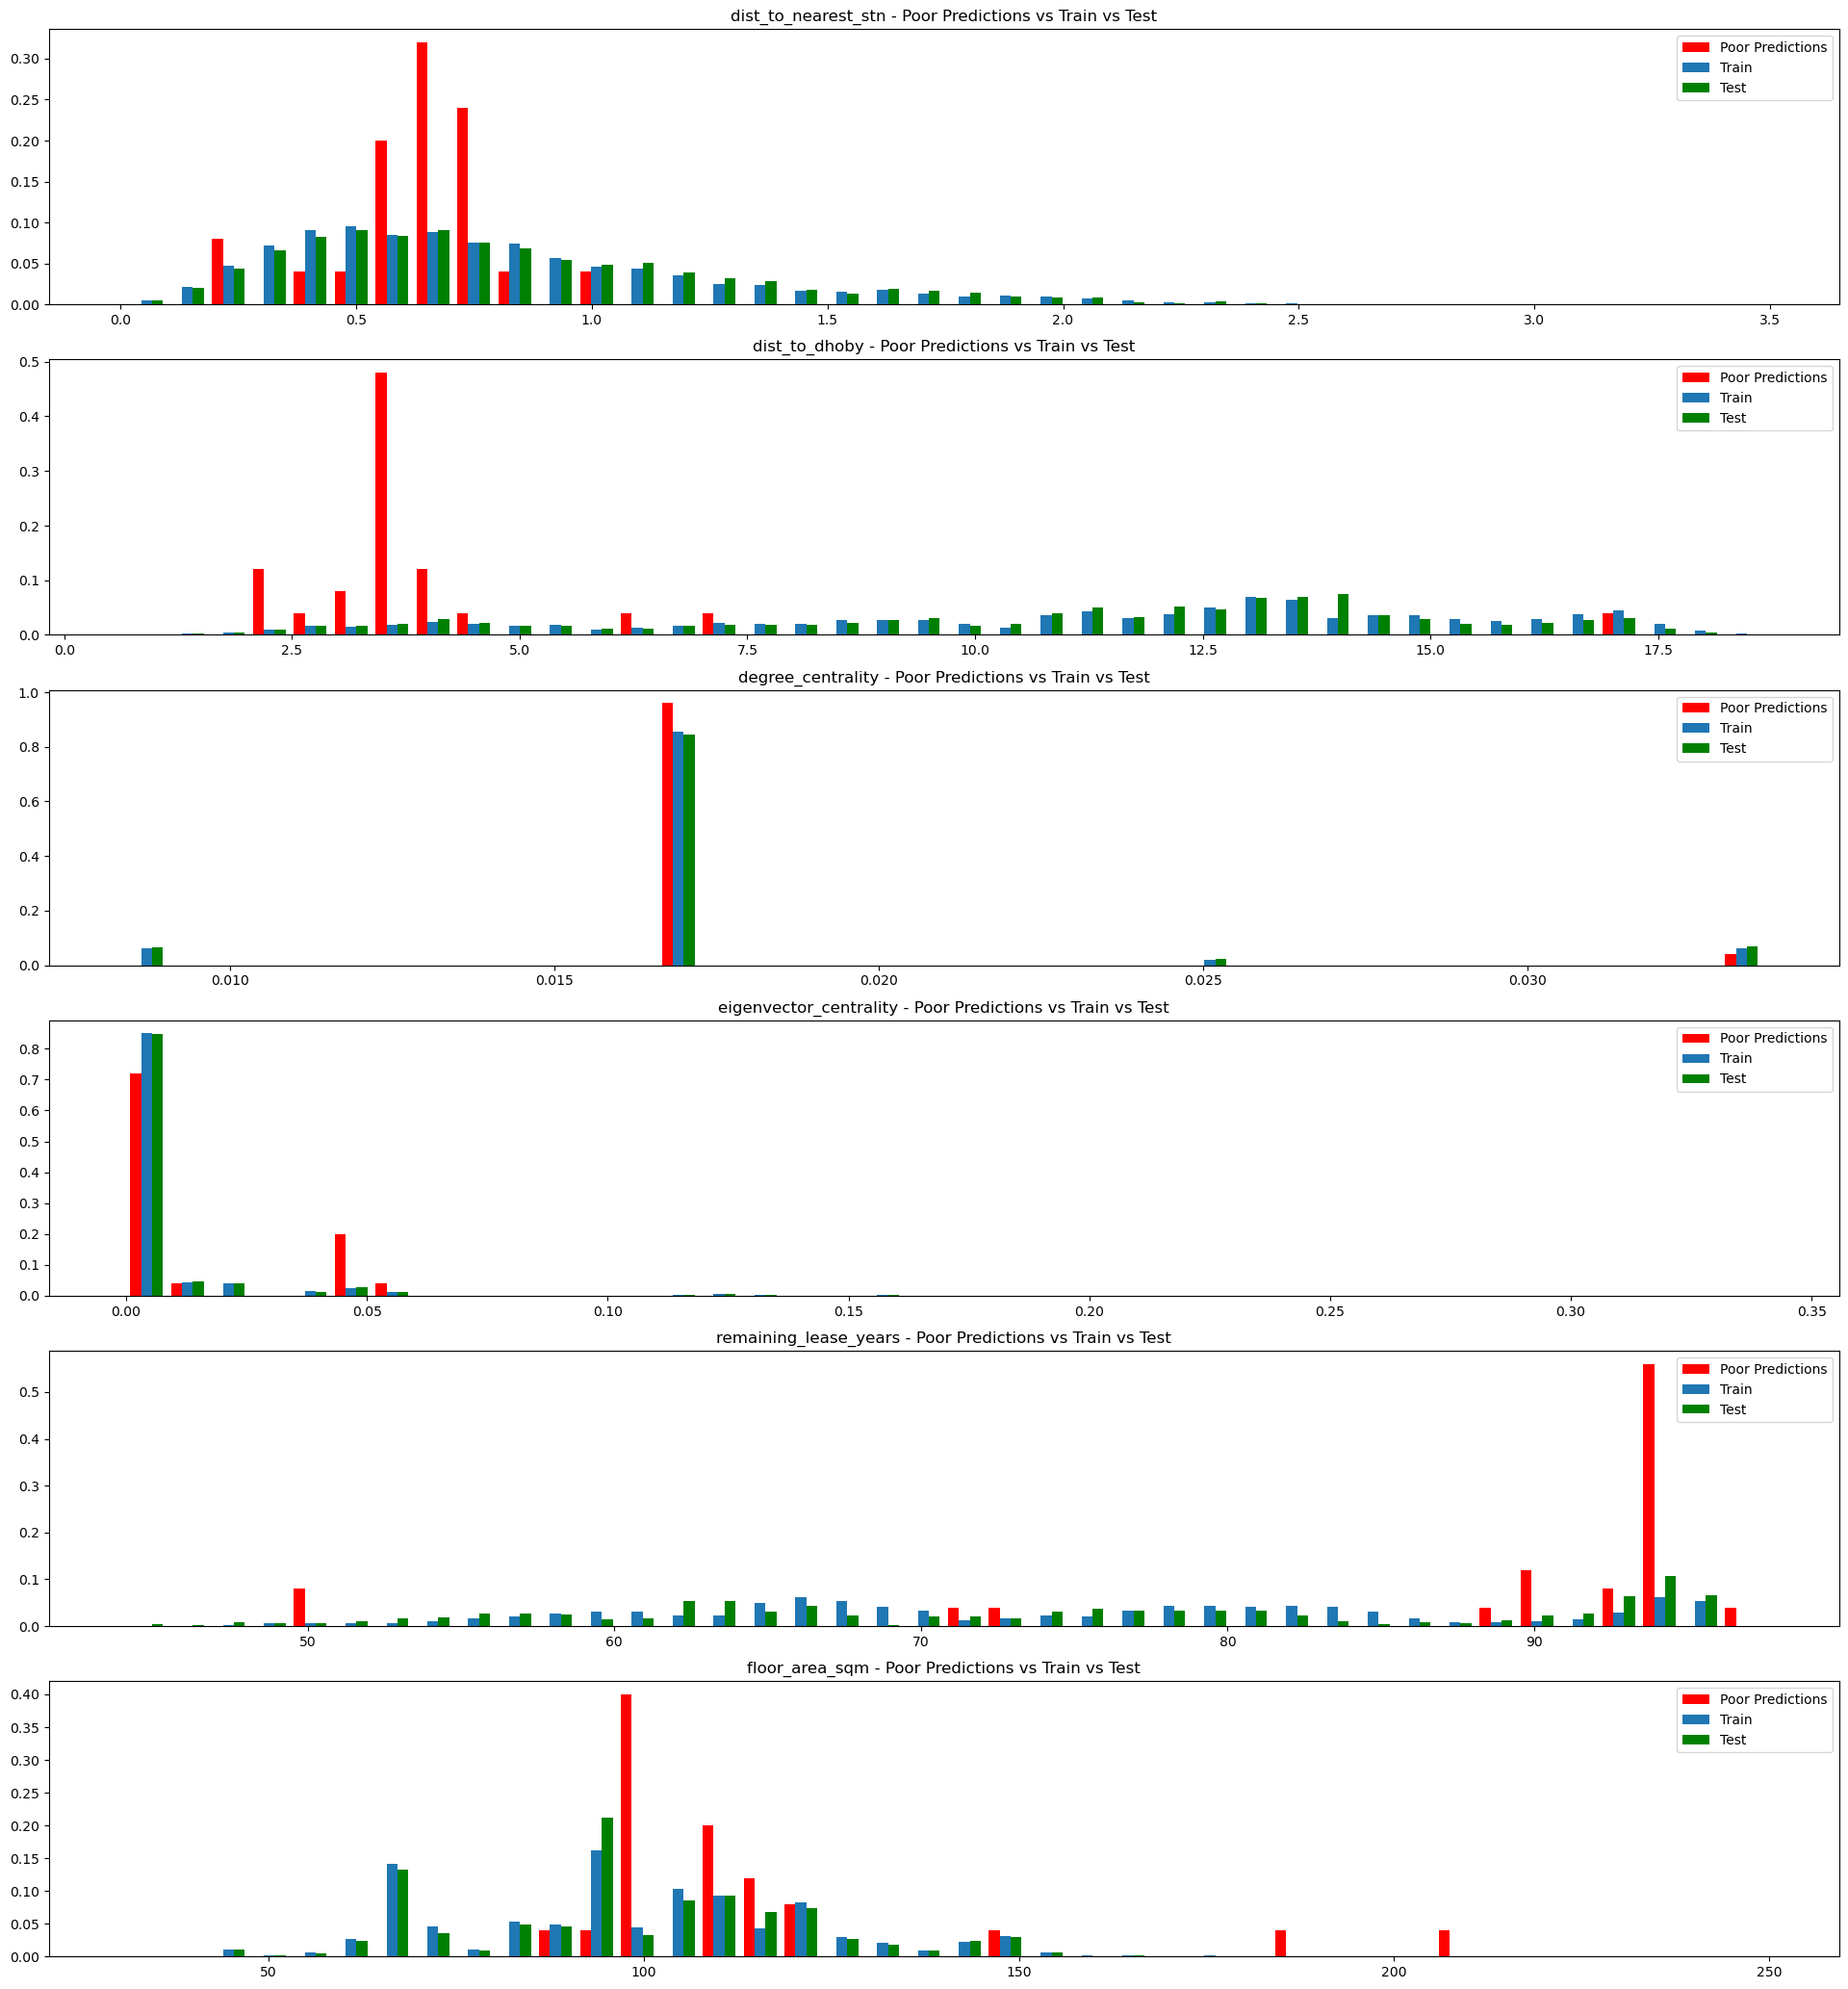

In [9]:
# Now we will compare the distribution the top 25 poor predictions of the continuous columns in the train and test samples with the distribution of the continuous columns in the poor predictions dataframe
# We will display both distributions in the same histogram (overlapping)

# Define a plot to hold the subplots
fig, axes = plt.subplots(nrows=len(continuous_cols), ncols=1, figsize=(24, 26))

# Iterate through the continuous columns
for col in continuous_cols:
    # Calculate weights for each distribution
    weight_poor_predictions = np.ones(len(poor_predictions[col])) / len(poor_predictions[col])
    weight_train_df = np.ones(len(train_df[col])) / len(train_df[col])
    weight_test_df = np.ones(len(test_df[col])) / len(test_df[col])
    
    # Calculate the min and max values for the x-axis
    min_value = min(poor_predictions[col].min(), train_df[col].min(), test_df[col].min())
    max_value = max(poor_predictions[col].max(), train_df[col].max(), test_df[col].max())
    
    # Plot histograms with normalized weights
    axes[continuous_cols.index(col)].hist(
        x=[poor_predictions[col], train_df[col], test_df[col]],  # Values to plot
        label=['Poor Predictions', 'Train', 'Test'],  # Labels for the legend
        bins=40,  # Number of bins
        weights=[weight_poor_predictions, weight_train_df, weight_test_df],  # Normalized weights
        color=['r', '#1f77b4', 'g']  # Red for poor predictions and blue for train
    )
    axes[continuous_cols.index(col)].legend()  # Display the legend
    axes[continuous_cols.index(col)].set_title(f'{col} - Poor Predictions vs Train vs Test')  # Set the title of the plot

In [10]:
# Continuous columns observations
continuous_observations = """
1. The most noticeable tren is the high number of poorly predicted samples with values of 'dist_to_dhoby' around 3.5. After a closer inspection in the top 25 poorly predicted samples, we can see that the samples with such values are located in the 'QUEENSTOWN' town. This supports the previous observation that the Queenstown area is quite complex and affects the model's performance.

2. The second observation that can be made clearly is the high number of poorly predicted samples with values of 'remaining_lease_years' above 90. Again, after a closer inspection in the top 25 poorly predicted samples, we can see that the samples with such values are located in the 'QUEENSTOWN' town. This supports the previous observation that the Queenstown area is quite complex and affects the model's performance.
"""
continuous_solutions = """
1 & 2. It seems the analysis for the continuous columns supports our observations from the analysis for the categorical columns. The poor predictions are concentrated in the 'QUEENSTOWN' town, which suggests that the model is not able to capture the complexity of this area. One way to reduce these errors is to ensure that the model is trained on a representative sample of the data. This means that the training data should include a good representation of all the unique values of the categorical columns. In this case, the model should be trained on a representative sample of the 'town' column, including the 'QUEENSTOWN' unique value. We should also ensure there is enough data for each unique value.
"""

# Display the observations and solutions
print(f'Observations:{continuous_observations}')
print(f'Solutions:{continuous_solutions}')

Observations:
1. The most noticeable tren is the high number of poorly predicted samples with values of 'dist_to_dhoby' around 3.5. After a closer inspection in the top 25 poorly predicted samples, we can see that the samples with such values are located in the 'QUEENSTOWN' town. This supports the previous observation that the Queenstown area is quite complex and affects the model's performance.

2. The second observation that can be made clearly is the high number of poorly predicted samples with values of 'remaining_lease_years' above 90. Again, after a closer inspection in the top 25 poorly predicted samples, we can see that the samples with such values are located in the 'QUEENSTOWN' town. This supports the previous observation that the Queenstown area is quite complex and affects the model's performance.

Solutions:
1 & 2. It seems the analysis for the continuous columns supports our observations from the analysis for the categorical columns. The poor predictions are concentrated 